# STEP 0 - INITIAL CODE SETUP

In [ ]:
# suspicion - suspicious or innocent
# record - theft, robbery, scam, murder, homicide etc...

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [ ]:
# Node
class Person:
    
    def __init__(self, name, suspicion, record):
        self.neighbors = [] # adjacency list
        self.name = name 
        self.suspicion = suspicion
        self.record = record
    
    def get_neighbors(self):
        return self.neighbors
    
    def get_name(self):
        return self.name
    
    def get_suspicion(self):
        return self.suspicion
    
    def get_record(self): 
        return self.record
    
    def add_neighbor(self, person):
        self.neighbors.append(person)
    
    def clear_neighbors(self):
        self.neighbors.clear()
    
    def __str__(self):
        return f"{self.name}: {self.neighbors}"
    
    def __repr__(self):
        return self.name

In [ ]:
class Graph:
    
    def __init__(self, graph_repr=None, directional=False):
        if graph_repr is None:
            graph_repr = []
        self.graph_repr = graph_repr
        self.graph_graphical = []
        self.directional = directional
        
    def show_graph(self, graphical=False):
        if not graphical:
            if self.graph_repr:
                for node in self.graph_repr:
                    print(node)
            else:
                print("Nothing in graph!")
        else:
            graphical = nx.Graph()
            graphical.add_edges_from(self.graph_graphical)
            nx.draw_networkx(graphical)
            plt.show()
    
    def get_nodes(self):
        return self.graph_repr
            
    def add_node(self, node):
        if node not in self.graph_repr:
            self.graph_repr.append(node)
        else:
            print("Node already present in graph!")
            
    def add_edge(self, node1, node2):
        if node1 in self.graph_repr and node2 in self.graph_repr:
            node1_repr = node1.name.split("person")[-1]
            node2_repr = node2.name.split("person")[-1]
            if self.directional is True:
                if node2 not in node1.get_neighbors():
                    node1.add_neighbor(node2)
                    self.graph_graphical.append([node1_repr, node2_repr])
                else:
                    print("Second node already present in node!")
            else:
                if node1 not in node2.get_neighbors() and \
                   node2 not in node1.get_neighbors():
                    node1.add_neighbor(node2)
                    node2.add_neighbor(node1)
                    self.graph_graphical.append([node1_repr, node2_repr]) 
                else:
                    print("Nodes already connected by an edge!")    
        else:
            print("A node is not present in graph!")
    
    def add_edges(self, node, edge_list):
        for neighbor in edge_list:
            self.add_edge(node, neighbor)
            
    def clear_edges(self):
        for item in self.graph_repr:
            item.clear_neighbors()
            
    def clear_graph(self):
        self.graph_repr.clear()

In [ ]:
class CriminalGroupDetection:
    
    def __init__(self, graph):
        self.graph = graph
        self.targets = {}
        self._get_poi()
    
    def _get_poi(self): # get persons of interest
        for person in self.graph.get_nodes():
            if person.get_suspicion == "suspicious":
                if person.get_record not in self.targets:
                    self.targets[person.get_record] = []
                    self.targets[person.get_record].append(person)
                else:
                    self.targets[person.get_record].append(person)
    
    def breadth_first_search(self, node):
        visited = [node]
        queue = [node]
        while queue:
            current_node = queue.pop(0)
            for neighbor in current_node.get_neighbors():
                if neighbor not in visited:
                    visited.append(neighbor)
                    queue.append(neighbor)
        return visited

    def determine_connection(self, node, target_level):
        last_node = node.get_neighbors()[-1]
        current_level = 1
        visited  = [node]
        queue = [node]
        while queue:
            current_node = queue.pop(0)
            for neighbor in current_node.get_neighbors():
                if current_level != target_level:
                    if neighbor != last_node:
                        if neighbor not in visited:
                            visited.append(neighbor)
                            queue.append(neighbor)
                    else:
                        current_level += 1
                        last_node = neighbor.get_neighbors()[-1]
                        if neighbor not in visited:
                            visited.append(neighbor)
                            queue.append(neighbor)
                else:
                    if neighbor not in visited:
                        visited.append(neighbor)
        return visited

    def show_targets(self):
        return self.targets

# TESTING

In [ ]:
testing = Graph()

In [ ]:
person16 = Person("person16", "suspicious", 'homicide')
person11 = Person("person11", "innocent", None)
person4 = Person("person4", "innocent", None)
person39 = Person("person39", "innocent", None)
person14 = Person("person14", "innocent", None)
person2 = Person("person2", "innocent", None)
person47 = Person("person47", "innocent", None)
person8 = Person("person8", "innocent", None)
person20 = Person("person20", "innocent", None)
person41 = Person("person41", "innocent", None)
person1 = Person("person1", "innocent", None)
person35 = Person("person35", "innocent", None)
person48 = Person("person48", "innocent", None)
person32 = Person("person32", "innocent", None)
person6 = Person("person6", "suspicious",'theft')
person21 = Person("person21", "innocent", None)
person5 = Person("person5", "suspicious", "arsony")
person3 = Person("person3", "innocent", None)
person10 = Person("person10", "suspicious",'arsony')
person23 = Person("person23", "innocent", None)
person37 = Person("person37", "innocent", None)
person45 = Person("person45", "innocent", None)
person23 = Person("person23", "innocent", None)
person51 = Person("person51", "suspicious", 'drugs')
person46 = Person("person46", "innocent", None)
person36 = Person("person36", "innocent", None)
person31 = Person("person31", "innocent", None)
person24 = Person("person24", "innocent", None)
person38 = Person("person38", "innocent", None)
person30 = Person("person30", "innocent", None)
person28 = Person("person28", "innocent", None)
person15 = Person("person15", "innocent", None)
person26 = Person("person26", "innocent", None)
person40 = Person("person40", "innocent", None)
person9 = Person("person9", "innocent", None)
person25 = Person("person25", "suspicious", 'theft')
person34 = Person("person34", "innocent", None)
person17 = Person("person17","innocent", None)
person42 = Person("person42", "innocent", None)
person49 = Person("person49", "innocent", None)
person18 = Person("person18", "suspicious", "theft")
person29 = Person("person29", "innocent", None)
person44 = Person("person44", "suspicious",'theft')

In [ ]:
testing.add_node(person16)
testing.add_node(person11)
testing.add_node(person4)
testing.add_node(person39)

testing.add_node(person14)
testing.add_node(person2)
testing.add_node(person47)
testing.add_node(person8)

testing.add_node(person20)
testing.add_node(person41)
testing.add_node(person1)
testing.add_node(person35)

testing.add_node(person48)
testing.add_node(person32)
testing.add_node(person6)
testing.add_node(person21)

testing.add_node(person5)
testing.add_node(person3)
testing.add_node(person10)
testing.add_node(person23)

testing.add_node(person37)
testing.add_node(person45)
testing.add_node(person23)
testing.add_node(person51)

testing.add_node(person46)
testing.add_node(person36)
testing.add_node(person31)
testing.add_node(person24)

testing.add_node(person38)
testing.add_node(person30)
testing.add_node(person28)
testing.add_node(person15)

testing.add_node(person26)
testing.add_node(person40)
testing.add_node(person9)
testing.add_node(person25)

testing.add_node(person34)
testing.add_node(person17)
testing.add_node(person42)
testing.add_node(person49)

testing.add_node(person18)
testing.add_node(person29)
testing.add_node(person44)
testing.show_graph()

Node already present in graph!
person16: []
person11: []
person4: []
person39: []
person14: []
person2: []
person47: []
person8: []
person20: []
person41: []
person1: []
person35: []
person48: []
person32: []
person6: []
person21: []
person5: []
person3: []
person10: []
person23: []
person37: []
person45: []
person51: []
person46: []
person36: []
person31: []
person24: []
person38: []
person30: []
person28: []
person15: []
person26: []
person40: []
person9: []
person25: []
person34: []
person17: []
person42: []
person49: []
person18: []
person29: []
person44: []


In [ ]:
testing.add_edge(person16, person4)
testing.add_edge(person11, person4)
testing.add_edge(person4, person2)
testing.add_edge(person2, person39)
testing.add_edge(person2, person14)
testing.add_edge(person2, person47)
testing.add_edge(person2, person8)
testing.add_edge(person2, person1)
testing.add_edge(person8, person20)
testing.add_edge(person8, person1)
testing.add_edge(person1, person35)
testing.add_edge(person1, person41)
testing.add_edge(person1, person32)
testing.add_edge(person1, person48)
testing.add_edge(person1, person6)
testing.add_edge(person1, person25)
testing.add_edge(person1, person26)
testing.add_edge(person1, person30)
testing.add_edge(person32, person21)
testing.add_edge(person6, person31)
testing.add_edge(person6, person30)
testing.add_edge(person30, person15)
testing.add_edge(person30, person24)
testing.add_edge(person15, person28)
testing.add_edge(person28, person38)
testing.add_edge(person15, person9)
testing.add_edge(person9, person34)
testing.add_edge(person9, person40)
testing.add_edge(person34, person25)
testing.add_edge(person34, person49)
testing.add_edge(person34, person18)
testing.add_edge(person17, person42)
testing.add_edge(person17, person18)
testing.add_edge(person18, person29)
testing.add_edge(person29, person44)
testing.add_edge(person31, person36)
testing.add_edge(person36, person46)
testing.add_edge(person46, person51)
testing.add_edge(person51, person3)
testing.add_edge(person3, person23)
testing.add_edge(person3, person21)
testing.add_edge(person21, person5)
testing.add_edge(person5, person10)
testing.add_edge(person10, person37)
testing.add_edge(person10, person45)

testing.show_graph()

person16: [person4]
person11: [person4]
person4: [person16, person11, person2]
person39: [person2]
person14: [person2]
person2: [person4, person39, person14, person47, person8, person1]
person47: [person2]
person8: [person2, person20, person1]
person20: [person8]
person41: [person1]
person1: [person2, person8, person35, person41, person32, person48, person6, person25, person26, person30]
person35: [person1]
person48: [person1]
person32: [person1, person21]
person6: [person1, person31, person30]
person21: [person32, person3, person5]
person5: [person21, person10]
person3: [person51, person23, person21]
person10: [person5, person37, person45]
person23: [person3]
person37: [person10]
person45: [person10]
person51: [person46, person3]
person46: [person36, person51]
person36: [person31, person46]
person31: [person6, person36]
person24: [person30]
person38: [person28]
person30: [person1, person6, person15, person24]
person28: [person15, person38]
person15: [person30, person28, person9]
perso

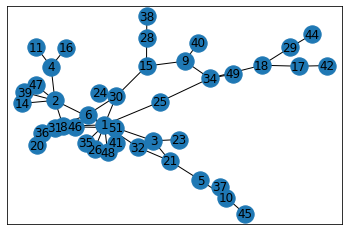

In [ ]:
testing.show_graph(graphical=True)

# STEP 1 - GRAPH GENERATION

---



In [ ]:
person51.get_neighbors()

[person46, person3]

In [ ]:
cubao = CriminalGroupDetection(testing)

In [ ]:
cubao.determine_connections(person49, 2)

[person49, person34, person9, person25, person18]